<a href="https://colab.research.google.com/github/sebastian122H/Rasselbande/blob/main/Python_for_Data_Science_Die_Rasselbande.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import pandas as pd
import numpy as np


# Data Cleaning and String Check

In [55]:
df = pd.read_csv("tmdb_movies_data.csv")
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [56]:
df.columns


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [57]:
df.drop(['imdb_id', 'popularity', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies',
       'vote_count', 'vote_average'],axis = 1, inplace=True)

In [58]:
df.dtypes

id                int64
budget            int64
revenue           int64
release_date     object
release_year      int64
budget_adj      float64
revenue_adj     float64
dtype: object

In [59]:
df

,id,budget,revenue,release_date,release_year,budget_adj,revenue_adj
0,135397,150000000,1513528810,6/9/2015,2015,1.379999e+08,1.392446e+09
1,76341,150000000,378436354,5/13/2015,2015,1.379999e+08,3.481613e+08
2,262500,110000000,295238201,3/18/2015,2015,1.012000e+08,2.716190e+08
3,140607,200000000,2068178225,12/15/2015,2015,1.839999e+08,1.902723e+09
4,168259,190000000,1506249360,4/1/2015,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...
10861,21,0,0,6/15/1966,1966,0.000000e+00,0.000000e+00
10862,20379,0,0,12/21/1966,1966,0.000000e+00,0.000000e+00
10863,39768,0,0,1/1/1966,1966,0.000000e+00,0.000000e+00
10864,21449,0,0,11/2/1966,1966,0.000000e+00,0.000000e+00


In [60]:
df = df.replace(0, np.nan)
df = df.dropna(how='all', axis=0)
df.dropna()

,id,budget,revenue,release_date,release_year,budget_adj,revenue_adj
0,135397,150000000.0,1.513529e+09,6/9/2015,2015,1.379999e+08,1.392446e+09
1,76341,150000000.0,3.784364e+08,5/13/2015,2015,1.379999e+08,3.481613e+08
2,262500,110000000.0,2.952382e+08,3/18/2015,2015,1.012000e+08,2.716190e+08
3,140607,200000000.0,2.068178e+09,12/15/2015,2015,1.839999e+08,1.902723e+09
4,168259,190000000.0,1.506249e+09,4/1/2015,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...
10822,396,7500000.0,3.373669e+07,6/21/1966,1966,5.038511e+07,2.266436e+08
10828,5780,3000000.0,1.300000e+07,7/13/1966,1966,2.015404e+07,8.733419e+07
10829,6644,4653000.0,6.000000e+06,12/17/1966,1966,3.125892e+07,4.030809e+07
10835,5923,12000000.0,2.000000e+07,12/20/1966,1966,8.061618e+07,1.343603e+08


In [61]:
def str_check(column): 
  for i in range(1, len(df.id)):
    if df.loc(i,) == str:

      df.replace(df.id(i), np.nan)
      df.dropna(how='all', axis=0)
      df

    else:

      return print("success")

def column_list():

  dict_column = {
      1:"id", 2:"budget", 3:"revenue", 4:"release_year", 5:"budget_adj", 6:"revenue_adj"
      }

  for i in range (0,6):
    str_check(dict_column[i])
    return 



column_list()

success


# Vizualisation

In [ ]:
## comparing growth over the years
## simple line graph with years on the bottom
##scatter plot plotting the two columns against each other
## check 
##histogram
##distribution of errors equal?
##        - adjust the data points to create a more linear relatiosip ln() or squared to find a linear relationship
##use that linear regression to determine the pearsons correlation coeffieicent (R^2) to see how a variation in x affects y
## use machine learning to make future predctions
## add dummy variables to increase the reliatbility of the predcitions

In [62]:
import pandas as pd
import matplotlib.pyplot as plt 

In [65]:
df.describe()

,id,budget,revenue,release_year,budget_adj,revenue_adj
count,10866.000000,5.170000e+03,4.850000e+03,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,3.073943e+07,8.922066e+07,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,3.890065e+07,1.620684e+08,12.812941,4.195701e+07,1.988419e+08
min,5.000000,1.000000e+00,2.000000e+00,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,6.000000e+06,7.708081e+06,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,1.700000e+07,3.182654e+07,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,4.000000e+07,9.991823e+07,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,4.250000e+08,2.781506e+09,2015.000000,4.250000e+08,2.827124e+09


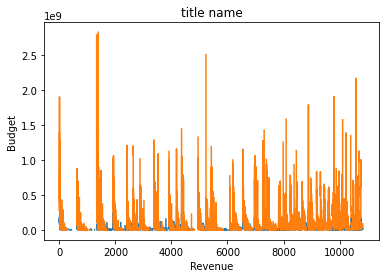

In [70]:
plt.plot(df[["budget_adj", "revenue_adj"]])
plt.title('title name')
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.show()

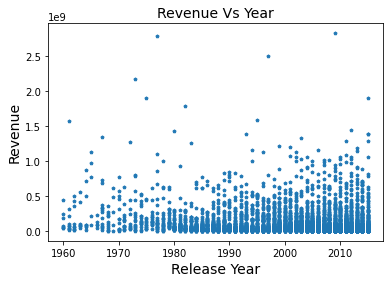

In [76]:
plt.scatter(df['release_year'], df['revenue_adj'], marker='p', s=10) 
plt.title('Revenue Vs Year', fontsize=14)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
# Optional to do with release date as well, just a bit more messy
plt.show()

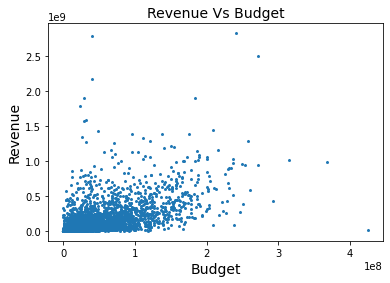

In [91]:
plt.scatter(df['budget_adj'], df['revenue_adj'], marker='o', s=5) 
plt.title('Revenue Vs Budget', fontsize=14)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Revenue', fontsize=14)

plt.show()

We can check for homegenity here, maybe linear relationbship analysis or something??

(array([1.916e+03, 1.038e+03, 6.900e+02, 4.100e+02, 2.890e+02, 2.320e+02,
        1.640e+02, 1.010e+02, 9.600e+01, 4.700e+01, 5.200e+01, 5.100e+01,
        2.200e+01, 1.700e+01, 1.500e+01, 6.000e+00, 1.100e+01, 5.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([9.21091051e-01, 1.41666676e+07, 2.83333342e+07, 4.25000008e+07,
        5.66666675e+07, 7.08333341e+07, 8.50000007e+07, 9.91666674e+07,
        1.13333334e+08, 1.27500001e+08, 1.41666667e+08, 1.55833334e+08,
        1.70000001e+08, 1.84166667e+08, 1.98333334e+08, 2.12500000e+08,
        2.26666667e+08, 2.40833334e+08, 2.55000000e+08, 2.69166667e+08,
        2.83333334e+08, 2.97500000e+08, 3.11666667e+08, 3.25833334e+08,
        3.40000000e+08, 3.54166667e+08, 3.68333333e+08, 3.82500000e+08,
        3.96666667e+08, 4.10833333e+08, 4.25000000e+08]),
 <a list of 30 Patch objects>)

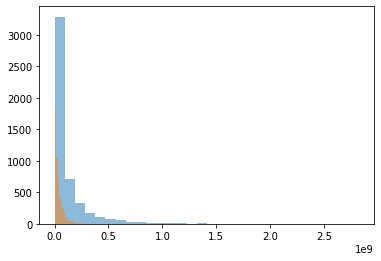

In [90]:

plt.hist(df["revenue_adj"], bins = 30, alpha = 0.5)
plt.hist(df["budget_adj"], bins = 30, alpha = 0.5)
